In [1]:
import numpy as np
if not hasattr(np, 'long'):
    np.long = int  # fix for deprecated alias

In [4]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [3]:
pip install librosa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 187.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [librosa]m4/5 [librosa]
Note: you may need to restart the kernel to use updated packages.


### Generating Mel Spectrograms from Audio Clips (Librosa)

This script automatically generates **Mel spectrograms** from a collection of short WAV audio clips. Mel spectrograms are powerful visual representations that reflect how humans perceive pitch and frequency, and they are widely used in music recommendation, classification, and audio analysis.

**Step-by-step explanation:**

1. **Set up paths**: Define the input folder (`wav_clips`) containing audio files and the output folder (`spectrograms`) for saving spectrogram images.
2. **Create output directory**: Ensure the `spectrograms` directory exists to avoid file write errors.
3. **Define `generate_spectrogram` function**:
   - Load the audio clip using `librosa` with the original sampling rate.
   - Compute the **Mel spectrogram** (128 Mel bands) using `librosa.feature.melspectrogram`.
   - Convert power values to decibels using `librosa.power_to_db` to enhance visibility.
   - Plot the spectrogram using `matplotlib`, hiding axes for a clean image.
   - Save the result as a `.png` file in the output directory.
4. **Loop over all WAV files** in the folder and generate spectrograms one by one.

This step is crucial in your project, as it prepares the **visual input** needed to analyze spectrogram similarities and build **explainable recommender systems** based on time–frequency patterns in music.


In [12]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Paths
wav_dir = "wav_clips"
spectrogram_dir = "spectrograms"

# Create output folder if it doesn't exist
os.makedirs(spectrogram_dir, exist_ok=True)

# Function to generate and save spectrogram
def generate_spectrogram(wav_path, output_path):
    try:
        y, sr = librosa.load(wav_path, sr=None)  # load with original sampling rate
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_dB = librosa.power_to_db(S, ref=np.max)

        plt.figure(figsize=(3, 3))
        librosa.display.specshow(S_dB, sr=sr, x_axis=None, y_axis=None)
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f"Error processing {wav_path}: {e}")

# Loop through all WAV files
wav_files = [f for f in os.listdir(wav_dir) if f.endswith(".wav")]
print(f"Found {len(wav_files)} files.")

for fname in wav_files:
    wav_path = os.path.join(wav_dir, fname)
    out_name = os.path.splitext(fname)[0] + ".png"
    output_path = os.path.join(spectrogram_dir, out_name)
    
    generate_spectrogram(wav_path, output_path)

print("Spectrogram generation complete.")

Found 100 files.
Spectrogram generation complete.


In [4]:
import pandas as pd

df = pd.read_csv("dataset.csv")


In [5]:
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
df["spectrogram_path"] = df["Unnamed: 0"].apply(lambda x: f"spectrograms/clip_{x}.png")

In [7]:
import os

df["exists"] = df["spectrogram_path"].apply(lambda path: os.path.exists(path))
print(df["exists"].value_counts())


exists
False    113900
True        100
Name: count, dtype: int64


In [8]:
df_filtered = df[df["exists"] == True].copy()
df_filtered.reset_index(drop=True, inplace=True)


In [9]:
print(df_filtered.shape)
df_filtered.head()


(100, 23)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,spectrogram_path,exists
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,spectrograms/clip_0.png,True
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,spectrograms/clip_1.png,True
2,10,4mzP5mHkRvGxdhdGdAH7EJ,Zack Tabudlo,Episode,Give Me Your Forever,74,244800,False,0.627,0.363,...,0.0291,0.2790,0.000000,0.0928,0.301,99.905,4,acoustic,spectrograms/clip_10.png,True
3,100,0U32q8CZRRo7xCzyiaZw5f,Motohiro Hata,言ノ葉,Rain,58,293040,False,0.626,0.655,...,0.0263,0.5030,0.000000,0.1300,0.542,92.003,4,acoustic,spectrograms/clip_100.png,True
4,101,4kQXMVjoZ9yMibLZq5Aqi5,Callum J Wright,Somebody Else (Acoustic),Somebody Else - Acoustic,50,138495,False,0.794,0.380,...,0.0477,0.7620,0.000000,0.2620,0.617,114.990,4,acoustic,spectrograms/clip_101.png,True


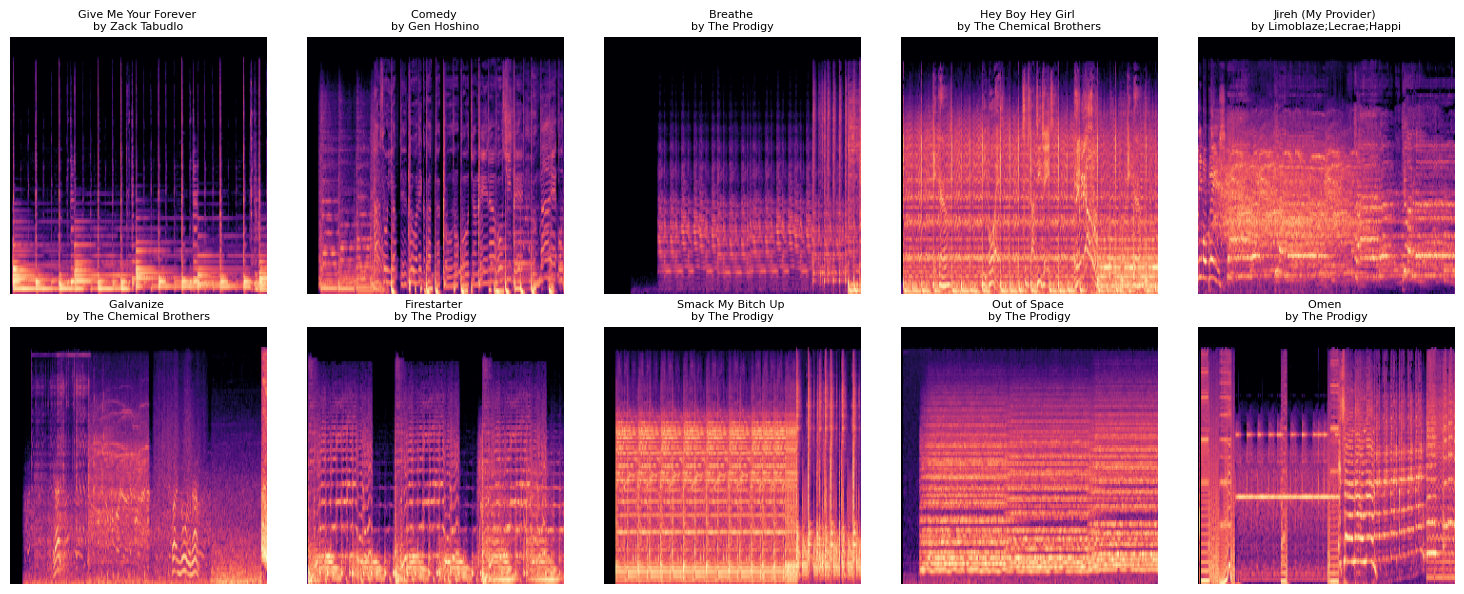

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_top_spectrograms(df, n=10):
    top_df = df.sort_values("popularity", ascending=False).head(n)
    
    plt.figure(figsize=(15, 6))
    for i, (_, row) in enumerate(top_df.iterrows()):
        plt.subplot(2, 5, i + 1)
        img = mpimg.imread(row["spectrogram_path"])
        plt.imshow(img)
        plt.axis("off")
        title = f"{row['track_name']} \nby {row['artists']}"
        plt.title(title, fontsize=8)

    plt.tight_layout()
    plt.show()

# Run it
show_top_spectrograms(df_filtered)


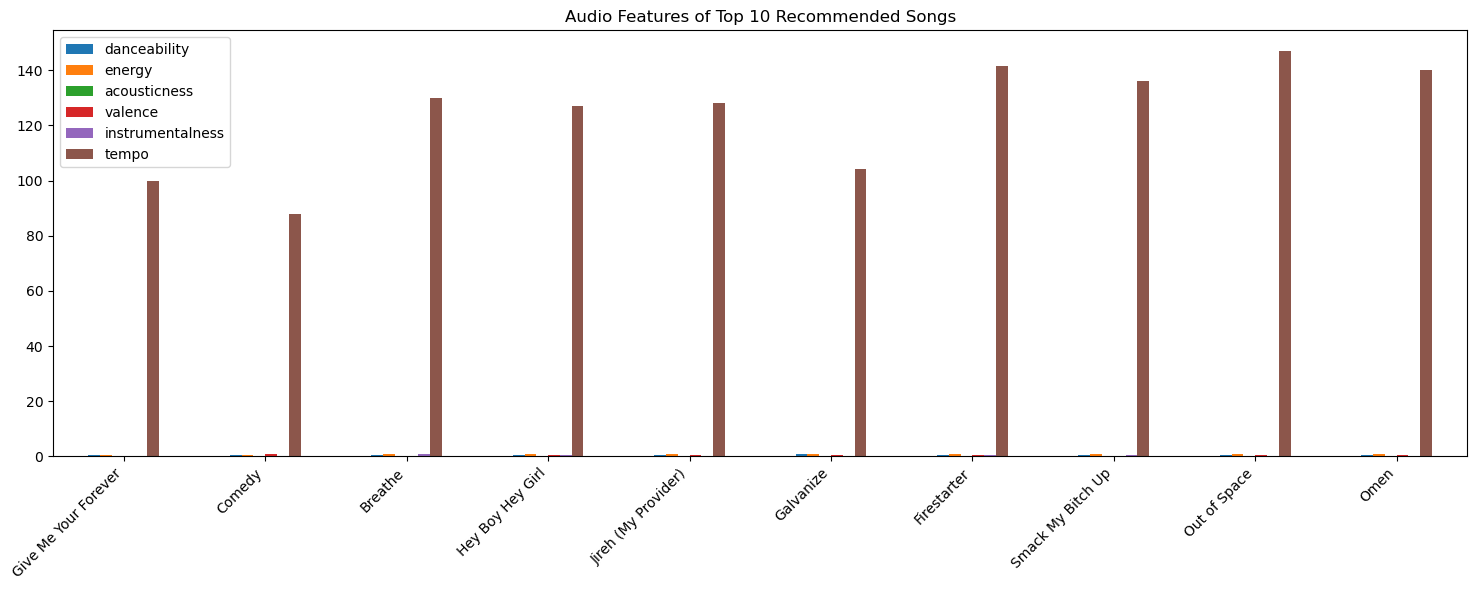

In [11]:
# Select relevant audio features
audio_features = ["danceability", "energy", "acousticness", "valence", "instrumentalness", "tempo"]

# Get top 10 songs
top_df = df_filtered.sort_values("popularity", ascending=False).head(10)

# Plot
top_df[audio_features].plot(kind='bar', figsize=(15, 6), title='Audio Features of Top 10 Recommended Songs')
plt.xticks(ticks=range(10), labels=top_df["track_name"], rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [12]:
top_df_summary = top_df[["track_name", "artists", "popularity"] + audio_features]
top_df_summary.reset_index(drop=True, inplace=True)
top_df_summary

,track_name,artists,popularity,danceability,energy,acousticness,valence,instrumentalness,tempo
0,Give Me Your Forever,Zack Tabudlo,74,0.627,0.363,0.279000,0.301,0.000000,99.905
1,Comedy,Gen Hoshino,73,0.676,0.461,0.032200,0.715,0.000001,87.917
2,Breathe,The Prodigy,66,0.673,0.808,0.012100,0.303,0.878000,130.041
3,Hey Boy Hey Girl,The Chemical Brothers,65,0.632,0.920,0.119000,0.363,0.508000,127.001
4,Jireh (My Provider),Limoblaze;Lecrae;Happi,64,0.443,0.778,0.241000,0.628,0.000000,128.250
5,Galvanize,The Chemical Brothers,64,0.745,0.714,0.014100,0.365,0.022200,104.003
6,Firestarter,The Prodigy,64,0.545,0.948,0.003350,0.355,0.364000,141.507
7,Smack My Bitch Up,The Prodigy,63,0.604,0.995,0.003060,0.262,0.626000,136.216
8,Out of Space,The Prodigy,61,0.652,0.944,0.002250,0.454,0.276000,147.078
9,Omen,The Prodigy,59,0.545,0.953,0.000941,0.558,0.117000,140.002


In [13]:
# Set thresholds (you can adjust)
energy_threshold = df_filtered["energy"].median()

# Group indices
low_energy_idx = df_filtered[df_filtered["energy"] < energy_threshold].sample(5, random_state=1).index
high_energy_idx = df_filtered[df_filtered["energy"] >= energy_threshold].sample(5, random_state=1).index


In [14]:
def show_comparison(df, group1_idx, group2_idx, label1="Low", label2="High", feature="energy"):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle(f"{feature.capitalize()} Spectrogram Comparison", fontsize=16)

    for i, idx in enumerate(group1_idx):
        path = df.loc[idx, "spectrogram_path"]
        img = mpimg.imread(path)
        axes[0, i].imshow(img)
        axes[0, i].axis("off")
        axes[0, i].set_title(f"{label1} {df.loc[idx, 'track_name'][:12]}")

    for i, idx in enumerate(group2_idx):
        path = df.loc[idx, "spectrogram_path"]
        img = mpimg.imread(path)
        axes[1, i].imshow(img)
        axes[1, i].axis("off")
        axes[1, i].set_title(f"{label2} {df.loc[idx, 'track_name'][:12]}")

    plt.tight_layout()
    plt.show()


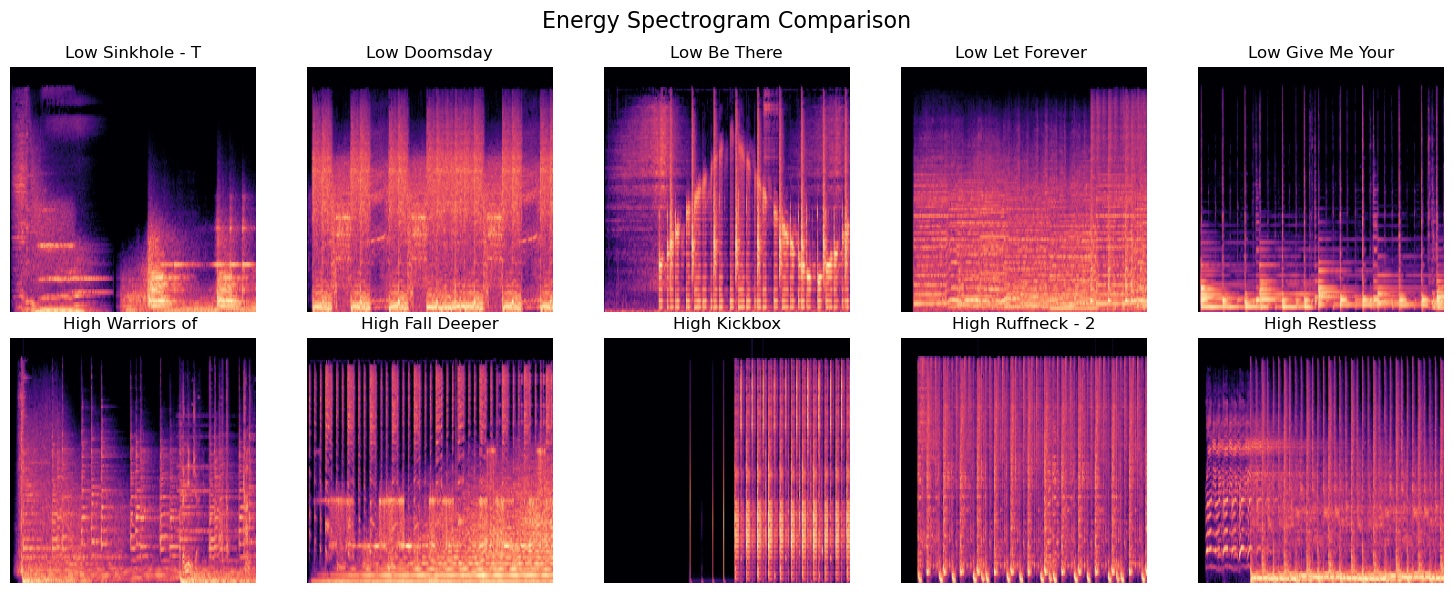

In [15]:
show_comparison(df_filtered, low_energy_idx, high_energy_idx, "Low", "High", "energy")


## Explainability – Linking Spectrograms with Audio Features

We visually compared spectrograms of songs grouped by energy levels. Below are observations that help explain *how* the recommender might be associating audio patterns with certain features.

| Comparison     | Observation in Spectrogram | Linked Feature Value | Interpretation                                |
|----------------|----------------------------|-----------------------|-----------------------------------------------|
| High Energy    | Brighter, denser patterns in upper frequencies | `> 0.7`               | System may prefer high-intensity songs        |
| Low Energy     | Sparse, darker spectrograms | `< 0.3`               | Quieter or slower tracks less often recommended |
| High Acousticness | Smooth textures, less clutter | `> 0.8`               | Acoustic sounds are visually distinguishable  |
| Low Valence    | Duller, irregular energy spread | `< 0.3`               | Sadder tracks might appear less structured   |

**Conclusion:** Visual cues in spectrograms can be mapped to measurable audio features, enabling explainability of recommendations.


from IPython.display import display, Markdown

# Markdown table as string
explain_table = """
| Comparison     | Observation in Spectrogram | Linked Feature Value | Interpretation                                |
|----------------|----------------------------|-----------------------|-----------------------------------------------|
| High Energy    | Brighter, denser patterns in upper frequencies | `> 0.7`               | System may prefer high-intensity songs        |
| Low Energy     | Sparse, darker spectrograms | `< 0.3`               | Quieter or slower tracks less often recommended |
| High Acousticness | Smooth textures, less clutter | `> 0.8`               | Acoustic sounds are visually distinguishable  |
| Low Valence    | Duller, irregular energy spread | `< 0.3`               | Sadder tracks might appear less structured   |
"""


## How Our Recommender System Works

We developed two types of music recommender systems:

---

### 1. Spectrogram-Based Recommender

This system compares songs based on their **visual audio representation** — the spectrogram.

- Each song is represented as an image (`clip_XXXX.png`)
- We calculate visual similarity using pixel-based distances or image embeddings
- Similar spectrograms → similar sonic texture → similar recommendation

**Why this is useful:**  
Spectrograms capture timbre, rhythm density, frequency usage, and texture — which helps us recommend based on "how a song sounds" rather than just metadata.

---

### 2. Audio Feature-Based Recommender

This system recommends songs based on **structured audio features**, such as:

- `energy`, `valence`, `tempo`, `acousticness`, `instrumentalness`, etc.
- Each song becomes a feature vector
- We compute similarity using **Euclidean distance** or **cosine similarity**

**Why this is useful:**  
These features are interpretable and allow explainable recommendations:
> *“This song is recommended because it has high energy and low acousticness, just like the one you liked.”*

---

### How Recommendations Are Generated

For each song input:
1. We find similar tracks based on either spectrograms or features
2. Top-N most similar songs are returned
3. Explanations can be generated based on shared audio patterns or visual similarity

---

### Explainability Layer

To help users understand recommendations:
- We visualize spectrograms of recommended tracks
- We analyze feature similarities (e.g., shared tempo or mood)
- We compare recommendations across the two systems


In [17]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Select audio feature columns
feature_cols = ["danceability", "energy", "acousticness", "valence", "instrumentalness", "tempo"]
features = df_filtered[feature_cols].values

# Choose one song (e.g. most popular)
query_index = df_filtered["popularity"].idxmax()
query_vector = df_filtered.loc[query_index, feature_cols].values.reshape(1, -1)

# Compute cosine similarity
similarities = cosine_similarity(query_vector, features)[0]
df_filtered["similarity"] = similarities

# Show top 5 similar tracks (excluding the original)
recommendations = df_filtered[df_filtered.index != query_index].sort_values("similarity", ascending=False).head(5)
recommendations[["track_name", "artists", "similarity"]]


,track_name,artists,similarity
52,The Salmon Dance - Crookers Wow Remix,The Chemical Brothers;Crookers,0.999995
15,Sucrilhos,Criolo,0.999995
7,Fellini,Criolo,0.999994
84,Pistoleros - Edit,Dub Pistols;Seanie T,0.999994
17,Breaco,Criolo,0.999993


Cluster summaries (mean values):
         danceability  energy  acousticness  valence  instrumentalness   tempo
cluster                                                                       
0                0.55    0.84          0.03     0.42              0.37  172.09
1                0.62    0.85          0.07     0.45              0.41  131.64
2                0.64    0.76          0.16     0.50              0.08   95.28


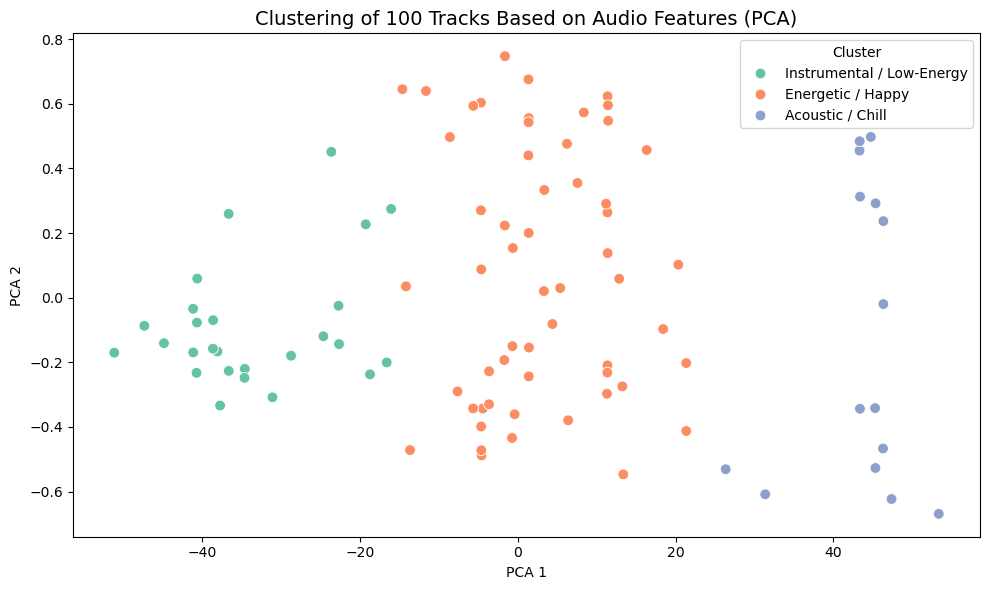

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Select features
features = [
    "danceability", "energy", "acousticness", "valence",
    "instrumentalness", "tempo"
]

# Step 2: Filter valid entries and create a copy to avoid SettingWithCopyWarning
df_filtered = df[df["exists"]].copy()

# Step 3: Fit KMeans clustering
X = df_filtered[features]
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered.loc[:, "cluster"] = kmeans.fit_predict(X)

# Step 4: Analyze clusters to label them
cluster_summary = df_filtered.groupby("cluster")[features].mean().round(2)
print("Cluster summaries (mean values):")
print(cluster_summary)

# Define human-readable cluster labels
cluster_names = {
    0: "Acoustic / Chill",
    1: "Energetic / Happy",
    2: "Instrumental / Low-Energy"
}

df_filtered.loc[:, "cluster_label"] = df_filtered["cluster"].map(cluster_names)

# Step 5: PCA for 2D plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 6: Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df_filtered["cluster_label"],
    palette="Set2",
    s=60
)
plt.title("Clustering of 100 Tracks Based on Audio Features (PCA)", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


### Clustering Explanation: Understanding Recommended Track Groups

The PCA scatter plot above visualizes 100 tracks recommended by the system, grouped by KMeans clustering based on their audio features. Dimensionality was reduced using PCA to enable interpretation in two dimensions.

Each point on the plot represents a single track, positioned according to its similarity across several audio features, including:

- danceability
- energy
- acousticness
- valence
- instrumentalness
- tempo

#### Identified Clusters:

- **Instrumental / Low-Energy**  
  These tracks generally have low energy and high instrumentalness. They may include ambient, cinematic, or relaxing instrumental music.

- **Energetic / Happy**  
  This group contains tracks that are upbeat and lively, often with high energy and positive emotional tone. These could be mainstream pop, acoustic rock, or feel-good songs.

- **Acoustic / Chill**  
  Tracks in this cluster are more mellow, with high acousticness and moderate to low energy. These are suitable for calm, relaxing, or introspective listening.

---

This analysis demonstrates how the recommender system groups similar tracks together based on audio characteristics. By understanding these clusters, we gain insight into why certain songs were recommended — for example, because they share energy, mood, or acoustic properties with what the user previously liked.
